In [23]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
df=pd.read_csv('data2.csv')
df.head()

,severity_class,ev_year_1.0,ev_year_2.0,ev_year_3.0,ev_year_4.0,ev_year_5.0,ev_year_6.0,ev_year_7.0,ev_year_8.0,ev_year_9.0,...,wind_dir_deg,wind_vel_kts,gust_kts,altimeter,dec_latitude,dec_longitude,cert_max_gr_wt,afm_hrs_last_insp,afm_hrs,crew_age
0,1,1,0,0,0,0,0,0,0,0,...,-0.331967,0.739304,-0.238516,-0.000300,-0.010371,-0.003129,-0.129643,-0.005586,-0.038301,0.226406
1,4,1,0,0,0,0,0,0,0,0,...,1.958724,1.941170,1.571597,0.002565,-0.010394,-0.001359,-0.139836,-0.006595,-0.177956,1.108107
2,5,1,0,0,0,0,0,0,0,0,...,0.404326,2.181543,-0.238516,0.002699,-0.010378,-0.001501,-0.119218,-0.006595,-0.168222,0.100449
3,4,1,0,0,0,0,0,0,0,0,...,0.240706,-0.462563,-0.238516,0.000167,-0.010366,-0.001984,0.044571,-0.006595,-0.093278,0.415342
4,4,1,0,0,0,0,0,0,0,0,...,0.322516,-0.462563,-0.238516,0.000367,-0.010372,-0.000185,-0.146555,-0.006595,0.125984,-1.033166


In [25]:
x = df.drop(columns=['severity_class'])
y = df[['severity_class']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x,y)

LogisticRegression()

In [28]:
model.score(x,y)

0.5730717185385656

In [29]:
from sklearn.metrics import accuracy_score,recall_score, f1_score, precision_score, balanced_accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
balance = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')        
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balance:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.57
Balanced Accuracy: 0.11
Precision: 0.58
Recall: 0.57
F1 Score: 0.42


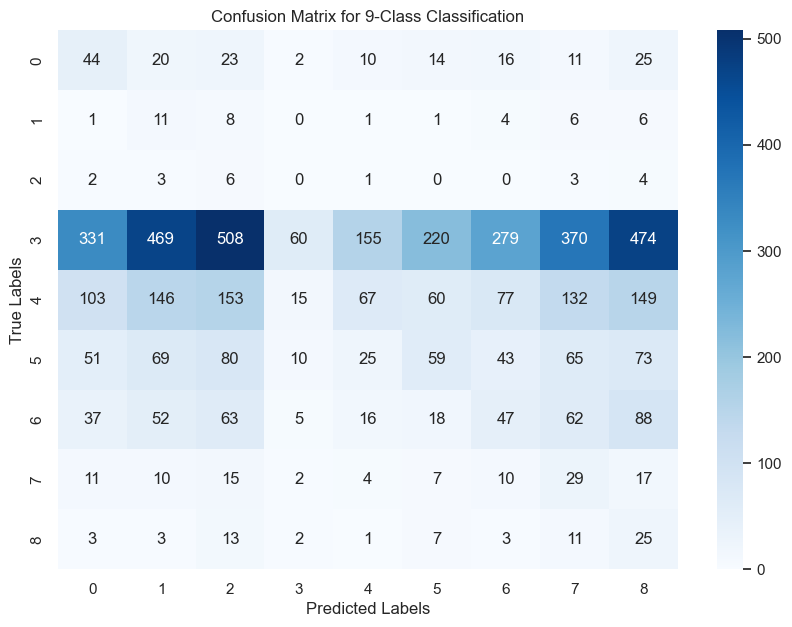

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()